# Fake News Detection

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection

In [2]:
df=pd.read_csv('/content/fake news.csv')
df.shape


(12520, 2)

In [3]:
df.head()

,text,label
0,sing praise mahinda lose voice sri lanka disro...,1
1,kojc rally first time davao city appoint son god,1
2,bill gate people resist mrna tsunami exclude s...,1
3,cure covid19 forward budesonide asthma drug pl...,1
4,president trump form patriot party 81 day elec...,1


In [4]:
df.shape

(12520, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12520 entries, 0 to 12519
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    12520 non-null  object
 1   label   12520 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 195.8+ KB


In [6]:
df.describe()

,label
count,12520.000000
mean,0.558786
std,0.496552
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


## Text Preprocessing


In [7]:
import re
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
print("Libraries imported and NLTK stopwords downloaded.")

Libraries imported and NLTK stopwords downloaded.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
def clean_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    text = re.sub(r'[^a-z0-9\s]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

df['cleaned_text'] = df['text'].apply(clean_text)
print("Text cleaning applied and 'cleaned_text' column created.")


Text cleaning applied and 'cleaned_text' column created.


## Feature Extraction




In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(df['cleaned_text'])

print("TF-IDF vectorization completed. Shape of tfidf_features:", tfidf_features.shape)

TF-IDF vectorization completed. Shape of tfidf_features: (12520, 33142)


## Data Splitting


In [10]:
from sklearn.model_selection import train_test_split

X = tfidf_features
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets.
X_train shape: (10016, 33142)
X_test shape: (2504, 33142)
y_train shape: (10016,)
y_test shape: (2504,)


## Model Training



In [11]:
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence on potentially large dataset

# Train the model
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


## Model Evaluation


Accuracy: 0.9241
Precision: 0.9131
Recall: 0.9599
F1-Score: 0.9359


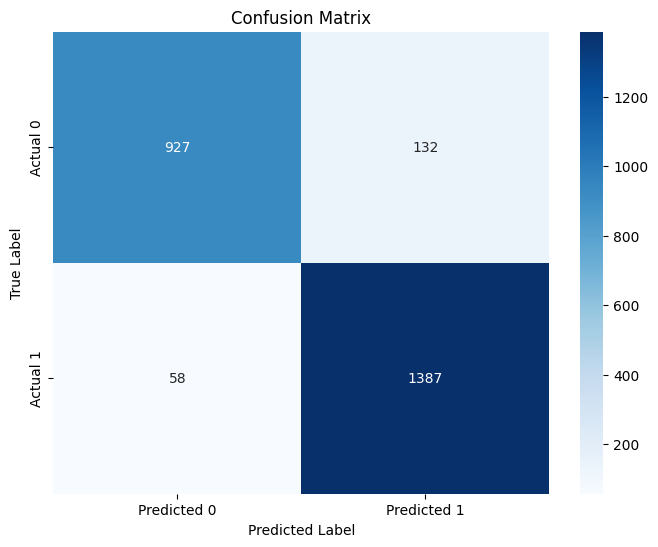

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
